# Aprendizaje no supervisado
## Algunas inicializaciones

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

#Importamos para dividir entre datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

## Aplicamos PCA en un ejemplo con imágenes, extraemos características

Text(0.5, 0.98, 'some_faces')

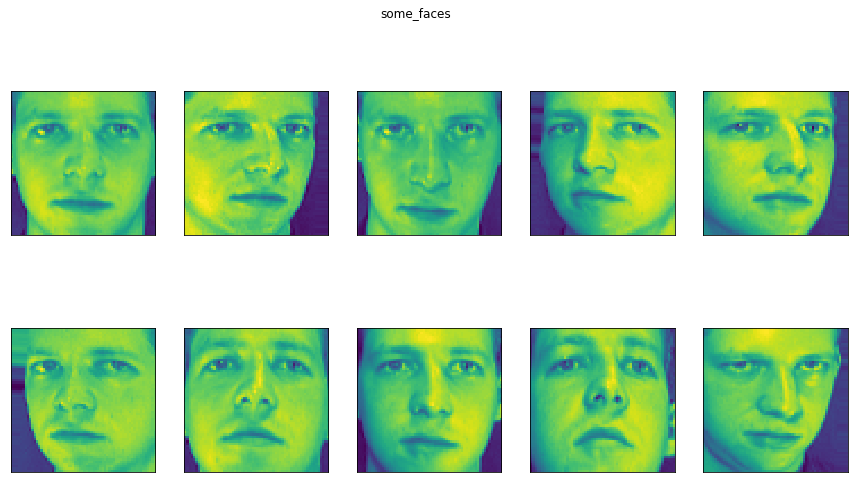

In [2]:
# Importamos el dataset de las fotos
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)


from sklearn.datasets import fetch_olivetti_faces
people = fetch_olivetti_faces()
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 # Dan: error con target_names
 #ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [3]:
print('(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):')
print(people.images.shape)
print('Número de personas a las que pertenecen las fotos:')
# Dan: error con target_names
#print(len(people.target_names))

(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):
(400, 64, 64)
Número de personas a las que pertenecen las fotos:


> Hay un problema con los datos y es que algunas personas tienen demasiadas fotos

In [4]:
# Contamos cuantas veces aparece cada target (cada persona)
counts = np.bincount(people.target)
# Imprimimos el nombre de cada persona y de fotos que tiene en el dataset
# Dan: error con target_names
##for i, (count, name) in enumerate(zip(counts, people.target_names)):
##    print("{0:25} {1:3}".format(name, count), '|',end=' ')
##    if (i + 1) % 3 == 0:
##        print()

> Cambiamos los datos para que no esten sesgados por aquellos que aparecen muchas veces

In [5]:
#mask = np.zeros(people.target.shape, dtype=np.bool_)
#for target in np.unique(people.target):
# mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data
y_people = people.target
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.

* Con los datos modificados aplicamos KNeighborsClassifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.93

> Antes de usar PCA nos conviene que los datos esten bien escalados, usamos una herramienta propia de PCA llamada whitened.\
> A continuación se muestra como funciona whitened

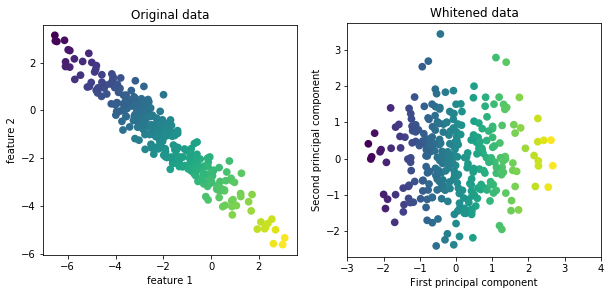

In [7]:
mglearn.plots.plot_pca_whitening()

* Aplicamos PCA usando whitned

In [8]:
pca = PCA(n_components=20, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 20)


* Aplicamos KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.95

* Interpretamos las componentes principales

In [10]:
pca.components_.shape

(20, 4096)

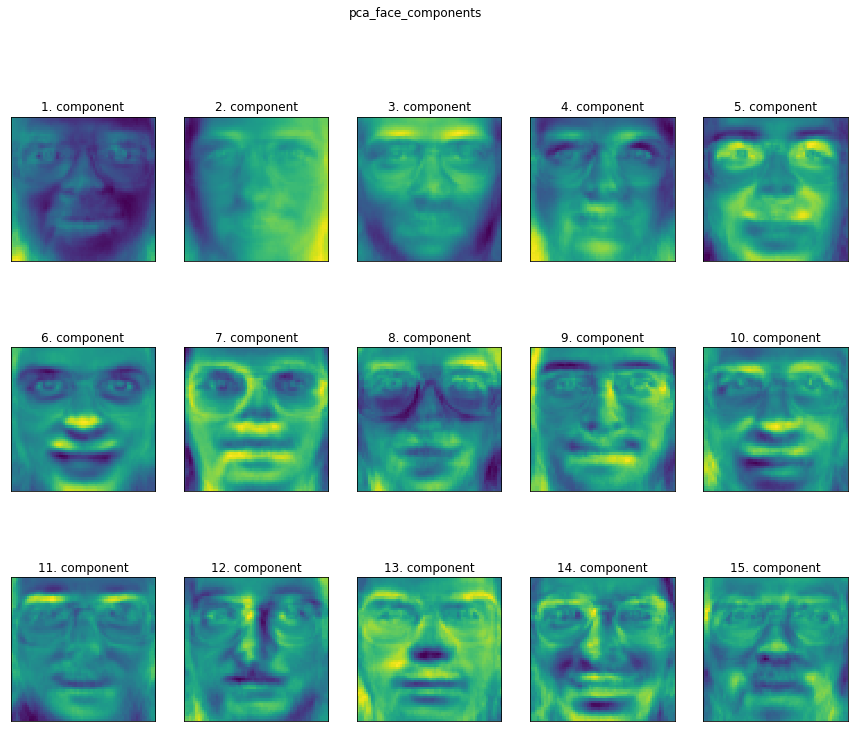

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("%d. component" % (i + 1))

* Vemos la influencia de las componentes

In [12]:
# Dan: error desconocido
#mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
#plt.suptitle("pca_reconstructions");

* Graficamos los datos con solo 2 componentes

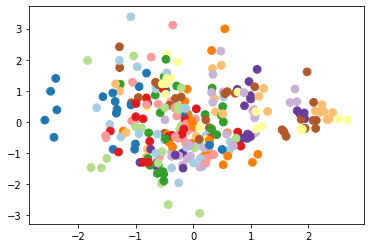

In [13]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Paired', s=60)